# Accessing data from NASA Astrophysics Archives Using Python

NASA missions have collected a huge amount of data spanning a large range in wavelengths. These data are housed in four different archives: the HEASARC, MAST, IRSA, NED. However, different physical locations are not an obstacle for astronomers doing multiwavelength science projects that need to make use of data from different archives. The archives have been working together to make sure that you don’t need to know too much about us to get the data you need to work together. We’ve done this by standardizing the way that programs can access the data we house. Since python is a very popular programming language, we are going to use it to show you how you can take advantage of this standardization to put together and analyze a multiwavelength data set. For this workshop, we are using a sample of interacting galaxies, and we will assemble a multiwavelength data set for it. You can generalize this example to much larger data sets of your own.

## TODO / QUESTIONS

Questions:

-What is the point of info like ivo://irsa.ipac/2mass/images/asky-at ?

-For SIA, how can I automatically tell if an SIA registry is SIA1 or SIA2, without a human reading about it?

-How do I deal with annoying warnings?

MAST questions:
-galex returns files from several surveys that must be filtered out at some point. There may be a survey parameter.

HEASARC questions:

-swiftuvot doesn't work with the same queries that I use for the rest. Tess sent me something, but I haven't spent enough time on it to make it work.

-The registry doesn't give me the correct swiftuvot url.


IRSA issues:

-2mass and wise don't accept format = image/fits even though the docs say they should. Have a query out to Walter. Meanwhile, galex returns lots of non-fits files that have to either be filtered out in the query (but then that breaks 2MASS and WISE) or after the query before writing the files (because that takes too long)

-IRSA SIA1 resources are not in the registry! Walter is working on it.


General TODO

-Each archive should provide base urls for their most popular data sets. For instance, it would be cool to get the HLA, SEIP in here.

-Get Table upload TAP example to work.

-test simple cone search example from HEASARC. Could change to galex for balance. Or Spitzer to see if there are any spectra available. Could leave as exercises or just add to IRSA examples.

-test SSA example from HEASARC.

-Make sure there is balance between archives for examples.

-Make the notebook look nice.

-Create instructions for participants, and test on someone.



<a id='toc'></a>


<a href='#availabledatasets'>1. Available Data Sets</a>

<a href='#availabledatasets'>2. Sample of Interacting Galaxies</a>

<a href = "#ned">3. Data Discovery -- NASA Extragalactic Database</a> What, if anything, should I do about the warnings?

<a href = "#registry">4. Data Discovery -- The Registry</a><BR>
<a href = "#registryheasarc">4a. Search the registry for simple image access resources available from HEASARC</a><BR>
<a href = "#registryallwise">4b. Search the registry for AllWISE</a><BR>
<a href = "#registrymultiwavelength">4c. Search the registry for several specific data sets</a><BR> How do I make this long line look nicer?<BR>
<a href = "#registryreplace">4d. Replace wrong data sets</a> SHOULD BE ABLE TO REMOVE WHEN REGISTRY ISSUES FIXED<BR>
<a href = "#registryremove">4e. Remove bad data sets</a> SHOULD BE ABLE TO REMOVE WHEN REGISTRY ISSUES FIXED<BR>


<a href = "#simpleimageaccess">5. Simple Image Access</a> HAVING A HARD TIME WITH CONSISTENCY OF FORMAT=image/fits<BR>

<a href = "#ucd">6. Universal Common Descriptors (UCDs)</a>

<a href = "#fetch">7. Retrieve the images that you found</a>

<a href = "#multiwavelengthsearch">8. Search a list of data sets for images that cover a position on the sky</a> LOTS OF WARNINGS HERE, TOO.<BR>

<a href = "#cutouts">9. Make Cutouts</a> UNWANTED MESSAGES HERE.<BR>

<a href = "#simpleconesearch">10. Catalogs: Simple Cone Search</a> NEED A SCIENTIFICALLY MOTIVATED TABLE FOR THIS FROM HEASARC OR MAST TO KEEP IT BALANCED.<BR>

<a href = "#tableaccessprotocol">11. Catalogs: Table Access Protocol</a> NOT QUITE FINISHED with second example (table upload)<BR>
<a href = "#tapexample1">11a. Simple TAP Query</a> <BR>
<a href = "#tapexample2">11b. Table upload TAP Query</a> <BR>

<a href = "#ssa">12. Simple Spectral Access</a>


<a id='availabledatasets'></a>

## 1. Available Data Sets

Many data sets are public.

NED: google for galaxies

HEASARC: High Energy

MAST: optical, near-infrared

IRSA: far-infrared, submillimeter

Can these be links to those notebooks?


<a href = "#toc">Table of Contents</a>

## 2. Sample of Interacting Galaxies

In [ ]:
from astropy.io import ascii
list_of_galaxies = ascii.read('interacting_gals.csv', delimiter=',')  
print(list_of_galaxies)     

<a href = "#toc">Table of Contents</a>

<a id='ned'></a>

## 3. Data Discovery: NASA Extragalactic Database

In [ ]:
from astropy.io import ascii
list_of_galaxies = ascii.read('interacting_gals.csv', delimiter=',')  
print(list_of_galaxies)     

In [159]:
import requests
import io
from astropy.table import Table
import urllib.parse
ned_base_url = 'http://vo.ned.ipac.caltech.edu'
search_radius = 5.0 / 3600.0
i = 0
for galaxies in list_of_galaxies:
    print(' ')
    print(i)
    position = str(galaxies['ra'])+','+str(galaxies['dec'])
    ned_objects_url = ned_base_url + '/services/querySED?REQUEST=queryData&POS='+position+'&SIZE='+str(search_radius)
    ned_objects_response = requests.get(ned_objects_url)
    if ned_objects_response.status_code == 200:
        ned_objects_table = Table.read(io.BytesIO(ned_objects_response.content))
        ned_targetname_url = ned_base_url+urllib.parse.quote(ned_objects_table[0]['ACREF'], safe = '/,&,?,=')
        if len(ned_objects_table) > 0: 
            ned_data_response = requests.get(ned_targetname_url)
            if ned_data_response.status_code == 200:
                ned_data_table = Table.read(io.BytesIO(ned_data_response.content))
                print(ned_data_table['DataSpectralPassBand'])
    i = i + 1


 
0


DataSpectralPassBand
--------------------
      FUV (GALEX) AB
      FUV (GALEX) AB
      NUV (GALEX) AB
      NUV (GALEX) AB
                 m_p
             B (m_B)
           B (m_B^0)
                   I
                   I
  J_14arcsec (2MASS)
                   J
                   J
                   H
  H_14arcsec (2MASS)
                   H
                 K_s
K_s_14arcsec (2MASS)
                 K_s
 
1
DataSpectralPassBand
--------------------
                 m_p
   V (Johnson) (OAN)
   R (Cousins) (OAN)
   I (Cousins) (OAN)
                   J
  J_14arcsec (2MASS)
                   J
  H_14arcsec (2MASS)
                   H
                   H
K_s_14arcsec (2MASS)
                 K_s
                 K_s
  4.5 microns (IRAC)
  4.5 microns (IRAC)
  5.8 microns (IRAC)
  5.8 microns (IRAC)
  8.0 microns (IRAC)
  8.0 microns (IRAC)
              1.4GHz
 
2
DataSpectralPassBand
--------------------
      FUV (GALEX) AB
      FUV (GALEX) AB
      NUV (GALEX) AB
     

<a href = "#toc">Table of Contents</a>

<a id='registry'></a>

## 4. Data Discovery -- The Registry

Archives register their data sets so that programs can discover them:
http://vao.stsci.edu/keyword-search/

The link above is a GUI, so you can play around with it. There is also an applications program interface (API) to this service, so that programs can send queries and retrieve search results automatically.

<a id='registryheasarc'></a>

### 4a. Find all simple image access data sets from HEASARC.

In [29]:
registry_url = "https://vao.stsci.edu/RegTAP/TapService.aspx/sync"

tap_params = {
    "request":"doQuery",
    "lang":"ADQL",
    "query":"""
        select b.waveband,b.short_name,a.ivoid,b.res_description,c.access_url,b.reference_url from rr.capability a 
        natural join rr.resource b 
        natural join rr.interface c
        where a.cap_type='simpleimageaccess' and a.ivoid like 'ivo://%irsa%'
        order by short_name;
    """
    }

r = requests.post(registry_url, data = tap_params)
table=Table.read(io.BytesIO(r.content))
#table.pprint(max_width=-1,max_lines=-1)

# Display results in a readable way including the 
# short_name, ivoid, res_description and reference_url.
from IPython.display import Markdown, display
for row in table:
    md = '### {} ({})'.format(row['short_name'].decode('utf-8'), row['ivoid'].decode('utf-8'))
    display(Markdown(md))
    print(row['res_description'].decode('utf-8'))
    print('(More info: {})'.format(row['reference_url']))

### 2MASS ASKY AT (ivo://irsa.ipac/2mass/images/asky-at)

This service provides access to and information about the 2MASS All-Sky Atlas Images. Atlas Images delivered by this service are in FITS format and contain full WCS information in their headers. Additionally, the image headers contain photometric zero point information. 2MASS Atlas Images are suitable for quantitative photometric measurements.
(More info: b'https://irsa.ipac.caltech.edu/applications/2MASS/IM')


### 2MASS QL (ivo://irsa.ipac/2mass/images/asky-ql)

This service provides access to and information about the 2MASS All-Sky Quicklook Images. The Quicklook Images delivered by this service are restored from lossy-compressed files in FITS format with full WCS information contained in the image headers. These images are suitable for position measurements, finding charts and visual inspection of the near-infrared sky.
(More info: b'https://irsa.ipac.caltech.edu/applications/2MASS/IM')


### Abell 1763 (ivo://irsa.ipac/spitzer/images/abell1763)

This data set includes images of the galaxy cluster Abell 1763 at visible and infrared wavelengths: r', J, H, and Ks obtained using the Palomar 200in telescope, as well as the IRAC and MIPS images from Spitzer. The cluster is covered out to approximately 3 virial radii with deep 24 mum imaging (a 5sigma depth of 0.2 mJy). This same field of ~40' × 40' is covered in all four IRAC bands as well as the longer wavelength MIPS bands (70 and 160 mum). The r' imaging covers ~0.8 deg2 down to 25.5 mag, and overlaps with most of the MIPS field of view. The J, H, and Ks images cover the cluster core and roughly half of the filament galaxies, which extend toward the neighboring cluster, Abell 1770.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/Abell1763')


### ACMC (ivo://irsa.ipac/herschel/images/acmc)

The Auriga-California molecular cloud is a large region of relatively modest star formation that is part of the Gould Belt. The Herschel Space Observatory program OT1_pharvey01_3 ("The Auriga-California Molecular Cloud: A Massive Nearby Cloud With Powerful Diagnostics For Early Stages of Star Formation", PI Paul Harvey) observed a 14.5 square degree area of the cloud in five far-infrared bands.
(More info: b'https://irsa.ipac.caltech.edu/data/Herschel/ACMC')


### AllWISE L3a (ivo://irsa.ipac/wise/images/allwise/l3a)

The AllWISE program builds upon the work of the successful Wide-field Infrared Survey Explorer mission (WISE; Wright et al. 2010) by combining data from the WISE cryogenic and NEOWISE (Mainzer et al. 2011 ApJ, 731, 53) post-cryogenic survey phases to form the most comprehensive view of the full mid-infrared sky currently available. By combining the data from two complete sky coverage epochs using an advanced data processing system, AllWISE has generated new products that have enhanced photometric sensitivity and accuracy, and improved astrometric precision compared to the 2012 WISE All-Sky Data Release. Exploiting the 6 to 12 month baseline between the WISE sky coverage epochs enables AllWISE to measure source motions for the first time, and to compute improved flux variability statistics. The AllWISE Images Atlas is comprised of 18,240 4-band calibrated 1.56°x1.56° FITS images, depth-of-coverage and noise maps, and image metadata produced by coadding nearly 7.9 million Single-exposure

### BOLOCAM_GPS (ivo://irsa.ipac/bolocam_gps/images)

The Bolocam Galactic Plane Survey (BGPS) is a 1.1 mm continuum survey of the Galactic Plane made using Bolocam on the Caltech Submillimeter Observatory. Millimeter-wavelength thermal dust emission reveals the repositories of the densest molecular gas, ranging in scale from cores to whole clouds. By pinpointing these regions, the connection of this gas to nascent and ongoing star formation may be explored. The BGPS coverage totals 170 square degrees (with 33" FWHM effective resolution). The survey is contiguous over the range -10.5 = l = 90.5, |b| = 0.5. Towards the Cygnus X spiral arm, the coverage was flared to |b| = 1.5 for 75.5 = l = 87.5. In addition, cross-cuts to |b| = 1.5 were made at l = 3, 15, 30 and 31. The total area of this section is 133 square degrees. With the exception of the increase in latitude, no pre-selection criteria were applied to the coverage in this region. In addition to the contiguous region, four targeted regions in the outer Galaxy were observed: IC1396 (9

### C2D (ivo://irsa.ipac/spitzer/images/c2d)

The c2d Spitzer Legacy project obtained images and photometry with both IRAC and MIPS instruments for five large, nearby molecular clouds. Three of the clouds were also mapped in dust continuum emission at 1.1 mm, and optical spectroscopy has been obtained for some clouds.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/C2D')


### CLASH (ivo://irsa.ipac/spitzer/images/clash)

The Cluster Lensing And Supernova survey with Hubble (CLASH) is an HST Multi-Cycle Treasury program (PI: Marc Postman) to survey 25 massive galaxy clusters at 16 wavelengths spanning from the near-UV to the near-IR (Postman et al. (2012)). The full HST dataset and associated catalogs and gravitational lens models are available at MAST. A series of programs with Spitzer have covered all CLASH galaxy clusters with IRAC Channels 1 and 2 (3.6 and 4.5 micron). Several of the targets include Channels 3 and 4 (5.8 and 8 micron) data. Spitzer mosaics, catalogs, and PSF images are available at IRSA.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/CLASH')


### Cold Cores (ivo://irsa.ipac/herschel/images/coldcores)

Herschel Data from the "Galactic Cold Cores: A Herschel Survey of the Source Populations Revealed by Planck" (Cold Cores) Open-Time Key Program are available here. IRSA is serving the Cold Cores imaging of 115 PACS and 116 SPIRE fields containing Planck cold dust detections. This is Herschel program KPOT_mjuvela_1.
(More info: b'https://irsa.ipac.caltech.edu/data/Herschel/ColdCores')


### COSMOS (ivo://irsa.ipac/cosmos/images)

The COSMOS Archive serves data taken for the Cosmic Evolution Survey with HST (COSMOS) project, using IRSA's general search service, Atlas. COSMOS is an HST Treasury Project to survey a 2 square degree equatorial field with the ACS camera.
(More info: b'https://irsa.ipac.caltech.edu/data/COSMOS')


### Cygnus-X (ivo://irsa.ipac/spitzer/images/cygnus-x)

The Cygnus-X region is one of the brightest regions of the sky at all wavelengths and one of the richest known regions of star formation of the Galaxy. The goals of the Cygnus-X survey are to provide a detailed picture of the processes that govern the evolution of massive star forming complexes, to study star formation in the massive star forming complex environment, and to provide a rich sample of intermediate to high mass protostars spanning the full range of protostellar evolution. The project will also allow us to assess the role of feedback in a massive OB star/molecular cloud complex. The survey imaged a ~24 square degree region centered near 20:30:25, +40:00 (J2000). The IRAC images had a median coverage of 3x12s high dynamic range (HDR) frames, and the MIPS data were taken in fast scanning mode in the 24 and 70 µm bands.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/Cygnus-X')


### DUNES (ivo://irsa.ipac/herschel/images/dunes)

The DUst around NEarby Stars (DUNES, Eiroa et al. 2013) Herschel Open Time Key Program (KPOT_ceiroa_1) is a survey of 133 stars in 130 fields with the Herschel/PACS photometer. All target stars were observed with the PACS 100 and 160 micron filters. A subset of stars were additionally observed with the PACS 70 micron filter and the SPIRE 250, 350 and 500 micron filters.
(More info: b'https://irsa.ipac.caltech.edu/data/Herschel/DUNES')


### DUSTiNGS (ivo://irsa.ipac/spitzer/images/dustings)

DUSTiNGS consists of a sample of 50 dwarf galaxies within 1.5 Mpc, which have been mapped with IRAC channels 1 and 2 (3.6 and 4.5 microns). The sample consists of 37 dwarf spheroidal, 8 dwarf irregular, and 5 transition-type galaxies. The DUSTiNGS data release includes images and source catalogs based on uniform Spitzer 3.6 and 4.5 micron observations.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/DUSTiNGS')


### EIGA (ivo://irsa.ipac/iras/images/eiga)

The Extended IRAS Galaxy Atlas (EIGA) is an extension of the original IRAS Galaxy Atlas (IGA) to b = 6.7 deg.. High resolution images at 60 microns and 100 microns have been produced to match the latitude coverage of radio continuum observations obtained as part of the Canadian Galactic Plane Survey (CGPS). Also associated with the EIGA and IGA is the Mid-Infrared Galaxy Atlas (MIGA).
(More info: b'https://irsa.ipac.caltech.edu/data/EIGA')


### FEPS (ivo://irsa.ipac/spitzer/images/feps)

The Formation and Evolution of Planetary Systems (FEPS) Spitzer Legacy program was designed to characterize the evolution of circumstellar gas and dust around solar-type stars between ages of 3 Myr and 3 Gyr. To achieve these goals, FEPS obtained spectrophotometric observations with the Spitzer Space Telescope for a sample of 328 stars. The observing strategy was to measure the spectral energy distribution (SED) between wavelengths of 3.6 and 70 µm with IRAC and MIPS photometry, and between 8 and 35 µm with low-resolution IRS spectra. In addition, the FEPS program obtained MIPS 160 µm photometry for 80 stars to search for colder dust, and high-resolution IRS spectra for 33 sources to probe for circumstellar gas.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/FEPS')


### FIDEL (ivo://irsa.ipac/spitzer/images/fidel)

Far-Infrared Deep Extragalactic Legacy Survey (FIDEL) contains sensitive and extensive far-infrared deep field observations with Spitzer to detect warm dust emission from hundreds of relatively ordinary starburst galaxies and active galactic nuclei at redshifts of 1 to 2 (7 to 10 billion years ago), and thousands more nearby. The survey also detected tens of thousands of high redshift objects at mid-infrared wavelengths. The program obtained data in three fields on the sky. The bulk of the data is in two fields, the Extended Chandra Deep Field South (ECDFS) and the Extended Groth Strip (EGS). A smaller amount of additional data was obtained in the GOODS-North area.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/FIDEL')


### FLS (ivo://irsa.ipac/spitzer/images/fls)

The Spitzer Extragalactic First Look Survey is composed of 4 square degrees of imaging with MIPS and IRAC centered at J1718+5930. Ancillary data are available from a wide variety of optical and radio observatories.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/FLS')


### Frontier (ivo://irsa.ipac/spitzer/images/frontier)

The Frontier Fields is a Spitzer and HST Director's Discretionary program of six deep fields centered on strong lensing galaxy clusters in parallel with six deep "blank fields". These will be the second deepest observations of blank fields and deepest observations of clusters and their lensed galaxies ever obtained. The first data release contains all archival data taken on these six clusters as well as data taken for the cycle-9 SURFS-UP (PID:90009) program as of April 1, 2013. Improved reductions with better artifact correction and deeper data will be released periodically over the three year period. IRSA hosts the Spitzer portion of the Frontier Fields data set. For the HST Frontier Fields data, see MAST.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/Frontier')


### GLIMPSE (ivo://irsa.ipac/spitzer/images/glimpse)

The Galactic Legacy Infrared Midplane Survey Extraordinaire (GLIMPSE) program covered the Galactic plane with the Spitzer IRAC instrument. GLIMPSEI covered 220 sq. degrees at |l|=10d-65d and b=-1d - +1d. GLIMPSEII covered the Galactic Center, l=-10d - +10d. GLIMPSE3D added vertical extensions, typically to |b|&lt;+3d. GLIMPSE360 covered the outer Galaxy (l=65d-265d) with IRAC 3.6 micron and 4.5 micron imaging. The Vela-Carina program covered l=255d-295d.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/GLIMPSE')


### GOALS (ivo://irsa.ipac/spitzer/images/goals)

The Great Observatories All-sky LIRG Survey (GOALS) combines imaging and spectroscopic data from NASA’s Spitzer, Hubble, Chandra and GALEX observatories in a comprehensive survey of over 200 of the most luminous infrared-selected galaxies in the local Universe.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/GOALS')


### GOALS (ivo://irsa.ipac/goals/images)

The GOALS sample consists of a total of 179 LIRGs (log (L_IR/L_sun) = 11.0-11.99) and 22 ultra-luminous infrared galaxies (ULIRGs: log (L_IR/L_sun) &gt; 12.0) selected from the IRAS Revised Bright Galaxy Sample; these 201 objects comprise a statistically complete flux-limited sample of infrared-luminous galaxies in the local universe. The GOALS objects have been the subject of an intense multi-wavelength observing campaign, including space-based imaging and spectroscopy from Spitzer and Herschel.
(More info: b'https://irsa.ipac.caltech.edu/data/GOALS')


### GOODS (ivo://irsa.ipac/spitzer/images/goods)

The Great Observatories Origins Deep Survey (GOODS) aims to unite extremely deep observations from NASA's Great Observatories (Spitzer, Hubble and Chandra), ESA's Herschel and XMM-Newton, and the most powerful ground-based facilities. The aim is to survey the distant universe to the faintest flux limits across the broadest range of wavelengths.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/GOODS')


### H-ATLAS (ivo://irsa.ipac/herschel/images/h-atlas)

The Herschel Astrophysical Terahertz Large Area Survey (H-ATLAS) is a survey of 600 deg^2 in five photometric bands - 100, 160, 250, 350 and 500 microns - with the Photoconductor Array Camera and Spectrometer (PACS) and Spectral and Photometric Imaging Receiver (SPIRE) cameras. H-ATLAS DR1 includes the survey of three fields on the celestial equator, covering a total area of 161.6 deg^2 and previously observed in the Galaxy and Mass Assembly (GAMA) spectroscopic survey.
(More info: b'https://irsa.ipac.caltech.edu/data/Herschel/H-ATLAS/')


### HELGA (ivo://irsa.ipac/herschel/images/helga)

HELGA observed Andromeda on a 5.5x2.5 degree field, an area ~4.5 larger with respect to any previous IR observations, with SPIRE and PACS fast scan Parallel Mode, thus obtaining the most complete FIR survey of this galaxy both in terms of spatial mapping and spectral coverage.
(More info: b'https://irsa.ipac.caltech.edu/data/Herschel/HELGA')


### HERITAGE (ivo://irsa.ipac/herschel/images/heritage)

The HERschel Inventory of The Agents of Galaxy Evolution (HERITAGE) open time key program mapped the Large Magellanic Cloud (LMC) and Small Magellanic Cloud (SMC) at 100, 160, 250, 350, and 500 microns using Herschel's PACS and SPIRE instruments. The overriding science goal of HERITAGE is to study the life cycle of matter as traced by dust in the LMC and SMC.
(More info: b'https://irsa.ipac.caltech.edu/data/Herschel/HERITAGE')


### HerM33es (ivo://irsa.ipac/herschel/images/herm33es)

Herschel PACS and SPIRE images of M33
(More info: b'https://irsa.ipac.caltech.edu/data/Herschel/HerM33es')


### HerMES (ivo://irsa.ipac/herschel/images/hermes)

The Herschel Multi-tiered Extragalactic Survey (HerMES) is a legacy programme (KPGT_soliver1) designed to map a set of nested fields totalling 380 sq. deg. Fields range in size from 0.01 to 20 sq. deg., using SPIRE at 250, 350 and 500 microns. These bands cover the peak of the redshifted thermal spectral energy distribution from interstellar dust and thus capture the reprocessed optical and ultraviolet radiation from star formation that has been absorbed by dust, and are critical for forming a complete multiwavelength understanding of galaxy formation and evolution.
(More info: b'https://irsa.ipac.caltech.edu/data/Herschel/HerMES/')


### HeVICS (ivo://irsa.ipac/herschel/images/hevics)

HeViCS is a survey of about 55 sq deg of the nearby Virgo galaxy cluster, obtained with the Herschel Space Observatory using the instruments PACS and SPIRE in parallel mode. It provides a wavelength coverage in five bands from about 100 to 600 microns. The science goals include: a) The detection of dust in the intra-cluster medium, b) Extended cold dust around galaxies, c) FIR-submm luminosity functions, d) The UV to sub-mm spectral energy distribution of galaxies of various morphological types, e) The detection of dust in dwarf and giant elliptical galaxies.
(More info: b'https://irsa.ipac.caltech.edu/data/Herschel/HeVICS/')


### HGBS (ivo://irsa.ipac/herschel/images/hgbs)

The Herschel Gould Belt Survey is one of the largest Herschel Key Projects. It conducted extensive far-infrared and submillimeter mapping of nearby molecular clouds with both the SPIRE and PACS instruments. It covered the bulk of the nearest (d &lt;= 0.5 kpc) cloud complexes in the Galaxy, which are mostly located in the Gould Belt, a giant (700 pc by 1000 pc), flat structure inclined by 20d to the Galactic plane.
(More info: b'https://irsa.ipac.caltech.edu/data/Herschel/HGBS/')


### HGOODS (ivo://irsa.ipac/herschel/images/goods)

The Great Observatories Origins Deep Survey (GOODS) aims to unite extremely deep observations from NASA's Great Observatories (Spitzer, Hubble and Chandra), ESA's Herschel and XMM-Newton, and the most powerful ground-based facilities. The aim is to survey the distant universe to the faintest flux limits across the broadest range of wavelengths.
(More info: b'https://irsa.ipac.caltech.edu/data/Herschel/GOODS')


### HHLI (ivo://irsa.ipac/herschel/images/hhli)

The Herschel High Level Images (HHLI) are a subset of the data in the Herschel Science Archive (HSA), the entire contents of which are accessible at IRSA through the Herschel Data Search tool. The HHLI represent PACS and SPIRE image products that have been processed to the highest level available through the Standard Product Generation (SPG) pipeline, version 14.0. They are provided here as a convenient way for users to quickly visualize PACS and SPIRE imaging for any given region on the sky observed by these two instruments.
(More info: b'https://irsa.ipac.caltech.edu/data/Herschel/HHLI/')


### HOPS (ivo://irsa.ipac/herschel/images/hops)

The Herschel Orion Protostar Survey (HOPS, KPOT_tmegeath_2) is a sample of 410 young stellar objects (YSOs) in the Orion molecular clouds, selected from Spitzer data. Most objects have near-infrared photometry from 2MASS, mid- and far-infrared data from Spitzer and Herschel, and submillimeter photometry from APEX; thus, the SEDs cover 1.2 - 870 microns and are used to classify the sample into protostellar classes. Of the 410 YSOs, 330 have Spitzer and Herschel data and are mostly protostars; the remaining objects include likely extragalactic contaminants and faint YSOs. Using mid-IR spectral indices and bolometric temperatures, the sample of 330 YSOs is classified into 92 Class 0 protostars, 125 Class I protostars, 102 flat-spectrum sources, and 11 Class II pre-main-sequence stars. HOPS also implements a simple protostellar model (including a disk in an infalling envelope with outflow cavities) to generate a grid of 30,400 model SEDs and uses it to determine the best-fit model paramete

### HPDP (ivo://irsa.ipac/herschel/images/hpdp)

Herschel's Heterodyne Instrument for the Far Infrared (HIFI) produced far-infrared spectral maps. HIFI data products automatically processed with the Standard Product Generation (SPG) pipeline are available through the Herschel Data Search. In contrast, the HIFI Highly Processed Data Products (HPDPs) available here have been produced by HIFI instrument scientists using the Herschel Interactive Processing Environment (HIPE), and can be regarded as being as close to science-ready as possible. HPDPs are available for observations taken in the On-The-Fly (OTF) and Dual Beam Switch (DBS) Raster modes during science programs and calibration campaigns, over the Routine and Check-Out phases. The first HPDP delivery (DR1, Nov. 2016) consists of Band 6 and 7 maps.
(More info: b'https://irsa.ipac.caltech.edu/data/Herschel/HPDP/')


### IGA (ivo://irsa.ipac/iras/images/iga)

The IRAS Galaxy Atlas (IGA) is a high resolution image atlas of the Galactic plane at 60 and 100 microns, it has been produced using the IRAS satellite data. The HIRES program was developed by the Infrared Processing and Analysis Center (IPAC) to produce high resolution (~ 1 arcmin) images from IRAS data using the Maximum Correlation Method (H.H. Aumann, J.W. Fowler and M. Melnyk, 1990, Astronomical Journal, 99, 1674).
(More info: b'https://irsa.ipac.caltech.edu/data/IGA')


### IRIS (ivo://irsa.ipac/iras/images/iris)

This new generation of IRAS images, called IRIS, benefits from better zodiacal light subtraction, calibration and zero levels compatible with DIRBE, and better destriping. At 100 microns, the IRIS product is also a significant improvement over the Schlegel et al. (1998) maps. IRIS keeps the full ISSA resolution, includes well calibrated point sources, and the diffuse emission calibration at scales smaller than 1 degree was corrected for the variation of the IRAS detector responsivity with scale and brightness. The uncertainty on the IRIS calibration and zero levels is dominated by the uncertainty of the DIRBE calibration and the accuracy of the zodiacal light model.
(More info: b'https://irsa.ipac.caltech.edu/data/IRIS')


### IRSA SIA (ivo://irsa.ipac/sia)

This is IRSA's implementation of version 2 of the IVOA Simple Image Access (SIA) protocol. Our SIA v2 service allows a rich variety of searches against IRSA's varied holdings.
(More info: b'https://irsa.ipac.caltech.edu/ibe/sia.html')


### ISSA (ivo://irsa.ipac/iras/images/issa)

The IRAS Sky Survey Atlas (ISSA) is a survey of 98% of the sky in four bands with effective wavelengths of 12, 25, 60 and 100 microns, which was done during a ten month period from January to November, 1983. The ISSA covers the sky with 430 fields. Each field is a 12.5 deg. by 12.5 deg. region centered every 10 deg. along declination bands which are spaced 10 deg. apart.
(More info: b'https://irsa.ipac.caltech.edu/data/ISSA')


### IUDF (ivo://irsa.ipac/spitzer/images/iudf)

The IRAC Ultradeep Field (IUDF) combines all ultradeep data ever taken with the Spitzer Infrared Array Camera (IRAC) at 3.6 and 4.5 microns over GOODS-South and the HUDF (+ parallels). The deepest observations come from the IRAC Ultra Deep Field (IUDF, ID 70145, PI Labbe) and IRAC Legacy over GOODS (IGOODS, PID 10076, PI Oesch) programs, combined with archival data from GOODS (PID 194, PI Dickinson), SEDS (PID 60022, PI G. Fazio), S-CANDELS (PID 70204, PI Fazio), ERS (PID 80217, PI Fazio), and UDF2 (PID 30866, PI Bouwens). The combined IRAC images in this data release amount to 1500 hour total integration time, ranging from &gt;50 hour over 150 sq. arcmin, and &gt;100 hour over 60 sq. arcmin, to ~200 hour over 5 - 10 sq. arcmin.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/IUDF')


### KINGFISH (ivo://irsa.ipac/herschel/images/kingfish)

KINGFISH is an imaging and spectroscopic survey of 61 nearby (d&lt;30 Mpc) galaxies, chosen to cover a wide range of galaxy properties and local interstellar medium (ISM) environments found in the nearby universe. Its broad goals are to characterize the ISM of present-day galaxies, the heating and cooling of their gaseous and dust components, and to better understand the physical processes linking star formation and the ISM.
(More info: b'https://irsa.ipac.caltech.edu/data/Herschel/KINGFISH')


### LGA (ivo://irsa.ipac/2mass/images/lga)

The high sensitivity and angular resolution of the 2MASS Large Galaxy Atlas (LGA) images allows closer inspection of diverse stellar populations, large-scale structures such as spirals, bulges, warps and bars, star formation regions and evolution of galaxies. This image atlas represents the first uniform, all-sky, view of galaxies as seen in the near-infrared wavelength window that is most sensitive to the dominant mass component of galaxies.
(More info: b'https://irsa.ipac.caltech.edu/data/LGA')


### LH (ivo://irsa.ipac/2mass/images/lh)

These Lockman Hole (LH) data represent a preliminary analysis of the deep 2MASS observations of this region, and are not a product endorsed by the 2MASS project. These data are described in The Astronomical Journal, Volume 125, Issue 5, pp. 2521-2530 "A Deep 2MASS survey of the Lockman Hole" by Beichman et al.
(More info: b'https://irsa.ipac.caltech.edu/data/LH')


### LVL (ivo://irsa.ipac/spitzer/images/lvl)

LVL consists of a sample of 258 galaxies, which have been mapped with both IRAC (4 bands) and MIPS (3 bands). In addition, ancillary data products consisting of images in the narrow-band H-alpha line emission and broad-band R (from the ground) and the UV continuum (2 bands) from GALEX are also available for many of the galaxies.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/LVL')


### M31IRAC (ivo://irsa.ipac/spitzer/images/m31irac)

Spitzer IRAC Observations of the Extended Disk and Halo of M31 (M31 IRAC) covers the major and minor axes of M31 with total lengths of 6.6 and 4.4 degrees, respectively. The M31 IRAC Catalog includes 426,529 sources.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/M31IRAC/')


### MESS (ivo://irsa.ipac/herschel/images/mess)

Herschel data from the "Mass-loss of Evolved StarS" (MESS) Guaranteed-Time Key Program are available here. IRSA is serving the MESS PACS imaging of 108 evolved stars. This is Herschel program KPGT_mgroen01_1. The sample of AGB stars has been selected to cover all chemical types (M-, S-, C-stars), variability types (irregular, semi-regular, Miras) and periods, and mass-loss rates. Stars have been selected to have high IRAS fluxes and low background levels.
(More info: b'https://irsa.ipac.caltech.edu/data/Herschel/MESS')


### MIGA (ivo://irsa.ipac/iras/images/miga)

The Mid-Infrared Galaxy Atlas (MIGA) is a high resolution image atlas of the Galactic plane at 12 microns and 25 microns, it has been produced using the HIRES processed infrared data from the IRAS satellite. It is a counterpart to the far-infrared IRAS Galaxy Atlas (IGA) and the Extended IRAS Galaxy Atlas (EIGA).
(More info: b'https://irsa.ipac.caltech.edu/data/MIGA')


### MIPS_LG (ivo://irsa.ipac/spitzer/images/mips_lg)

The MIPS Local Galaxies program compiles the Spitzer MIPS observations of all available galaxies in several Herschel-SPIRE Local Galaxies Guaranteed Time Programs, including the Very Nearby Galaxies Survey (VNGS), Dwarf Galaxy Survey (DGS), Herschel Reference Survey (HRS), and Herschel Virgo Cluster Survey (HeViCS).
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/MIPS_LG')


### MIPSGAL (ivo://irsa.ipac/spitzer/images/mipsgal)

MIPSGAL is a survey of the inner 248 square degrees of the Galactic plane at 24 and 70 microns using the MIPS instrument aboard the Spitzer Space Telescope. The survey covers Galactic latitudes of -1° &lt; b &lt; +1° for Galactic longitudes of l &lt; 62° and l &gt; 298°. Version 3.0 of the MIPSGAL data includes mosaics only at 24um, but covering the entire survey region. |b| &lt; 1° is covered for -68° &lt; l &lt; 69°, and |b| &lt; 3° is covered for -8° &lt; l &lt; 9°.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/MIPSGAL')


### MSX (ivo://irsa.ipac/msx/images)

The Midcourse Space Experiment (MSX), a Ballistic Missile Defense Organization satellite, was launched in April 1996. The first ten months of the mission were devoted to mid-infrared observations with a solid hydrogen-cooled telescope. This instrument had five line-scanned focal plane arrays that spanned the spectral region from 4.2 to 26 microns.
(More info: b'https://irsa.ipac.caltech.edu/data/MSX')


### MUSYC (ivo://irsa.ipac/musyc/images)

The Multiwavelength Survey by Yale-Chile (MUSYC) consists of deep optical medium-band and broadband optical and near-IR imaging of the ~30'x30' Extended Chandra Deep Field South. This field includes the GOODS-South field and the Hubble Ultra Deep Field, and covers the same area as the SIMPLE Spitzer Legacy program.
(More info: b'https://irsa.ipac.caltech.edu/data/MUSYC')


### NEOWISE-R L1b (ivo://irsa.ipac/wise/images/neowise-r/l1b)

The Near-Earth Object Wide-field Infrared Survey Explorer Reactivation Mission (NEOWISE; Mainzer et al. 2014, ApJ, 792, 30) is a NASA Planetary Science Division space-based survey to detect, track and characterize asteroids and comets, and to learn more about the population of near-Earth objects that could pose an impact hazard to the Earth. NEOWISE systematically images the sky at 3.4 and 4.6 µm, obtaining multiple independent observations on each location that enable detection of previously known and new solar system small bodies by virtue of the their motion. Because it is an infrared survey, NEOWISE detects asteroid thermal emission and is equally sensitive to high and low albedo objects. The NEOWISE 2015 Data Release is the first annual release of Single-exposure data, and contains all observations from the first year of survey operations, 13 December 2013 to 13 December 2014 UTC. NEOWISE scanned the sky nearly two complete times during this period, accumulating 24 or more indepen

### PEP (ivo://irsa.ipac/herschel/images/pep)

The PACS Evolutionary Probe (PEP, Lutz et al. 2011) is a Herschel guaranteed time deep extragalactic survey (KPGT_dlutz_1) targeting six among the most popular "blank fields", ten lensing clusters of galaxies, and two z ~1 clusters at wavelengths of 100 and 160 microns. PEP includes SPIRE observations of the two z ~1 clusters at wavelengths of 250, 350, and 500 microns. SPIRE coverage of all other fields is available from the HerMES survey (Oliver et al. 2010). In addition, deep SPIRE GOODS-N data are provided by the GOODS-Herschel program (Elbaz et al. 2011).
(More info: b'https://irsa.ipac.caltech.edu/data/Herschel/PEP')


### PHPDP (ivo://irsa.ipac/herschel/images/phpdp)

The main purpose of these Highly Processed Data Products (HPDP) is to improve the quality of the PACS JScanam maps of very extended regions. These regions could not be covered by a single PACS observation (scan + cross-scan) and required several pointings. Examples of these kind of maps are those of the Milky Way, the Orion star forming region and the Large and Small Magellanic Clouds.
(More info: b'https://irsa.ipac.caltech.edu/data/Herschel/PHPDP/')


### S-CANDELS (ivo://irsa.ipac/spitzer/images/s-candels)

The Spitzer-Cosmic Assembly Deep Near-Infrared Extragalactic Legacy Survey (S-CANDELS) is a Spitzer Cycle 8 Exploration Program (PI G. Fazio) that obtained deep IRAC channel 1 and 2 imaging in five widely separated extragalactic fields: the UKIDSS Ultra-Deep Survey (UDS), the Extended Chandra Deep Field South (ECDFS), COSMOS, the HST Deep Field North (HDFN), and the Extended Groth Strip (EGS). S-CANDELS builds upon the existing coverage of these fields obtained as part of the Spitzer Extended Deep Survey (SEDS), a Cycle 6 Exploration Program, by increasing the integration time from 12 hours to a total of 50 hours within a smaller area of 0.16 deg2.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/S-CANDELS')


### S4G (ivo://irsa.ipac/spitzer/images/s4g)

The Spitzer Survey of Stellar Structure in Galaxies (S4G) is a volume-, magnitude-, and size-limited survey of over 2300 nearby galaxies at 3.6 and 4.5µm. This is an extremely deep survey reaching an unprecedented 1s surface brightness limit of µ3.6µm(AB) = 27 mag arcsec-2. This translates to a stellar surface density of &lt;&lt; 1 M? pc-2 ! S4G can thus probe the stellar structure in galaxies in a regime where the gas dominates the stars (typical HI surface density ~ a few M? pc-2).
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/S4G')


### SAFIRES (ivo://irsa.ipac/spitzer/images/safires)

The Spitzer Archival FIR Extragalactic Survey (SAFIRES) is an offshoot of the Spitzer Space Telescope Enhanced Imaging Products (SEIP). SAFIRES applies the SEIP project's methods to the remaining two MIPS bands, located at far-infrared wavelengths of 70 and 160 microns. Due to the complexity of far-infrared observations, these bands require an expansion of SEIP's standard pipeline through the addition of reprocessing tools. These additional steps are required to remove obvious artifacts before extracting useful measurements. As a result, these bands were not included in the SEIP project, but were later funded through an additional NASA Astrophysics Data Analysis Program (ADAP) grant. To ensure high reliability, the SAFIRES sample includes no fields near the Galactic disk; these observations comprised more than half of the area observed by Spitzer, but the practical drawbacks of Galactic contamination would inhibit the ability to maintain the level of reliability desired in the SAFIRES 

### SAG-4 (ivo://irsa.ipac/herschel/images/sag-4)

The goal of the "Evolution of interstellar dust" guaranteed time key project (PI: A. Abergel &amp; A. Zavagno) is to explore with Herschel the far-infrared (FIR) to submillimeter (submm) emission properties of dust particles in a wide range of regions within our Galaxy, from very diffuse clouds to sites of star formation and proto-stars. Photometric data taken with SPIRE and PACS are complemented with spectroscopy using the FTS of SPIRE and PACS to derive the physical conditions of the gas from the lines of [CI], the high-level rotational lines of CO, and the major cooling lines of [CII] and [OI].
(More info: b'https://irsa.ipac.caltech.edu/data/Herschel/SAG-4/')


### SAGE (ivo://irsa.ipac/spitzer/images/sage)

The Surveying the Agents of a Galaxy's Evolution (SAGE) survey covers the Large Magellanic Cloud (LMC; ~7deg×7deg) using the IRAC (3.6, 4.5, 5.8, and 8 mum) and MIPS (24, 70, and 160 mum) instruments on board the Spitzer Space Telescope. Three key science goals determined the coverage and depth of the survey. The detection of diffuse ISM with column densities &gt;1.2×1021 H cm-2 permits detailed studies of dust processes in the ISM. SAGE's point-source sensitivity enables a complete census of newly formed stars with masses &gt;3 Msolar that will determine the current star formation rate in the LMC. SAGE's detection of evolved stars with mass-loss rates &gt;1×10-8 Msolar yr-1 will quantify the rate at which evolved stars inject mass into the ISM of the LMC. The observing strategy includes two epochs in 2005, separated by 3 months, that both mitigate instrumental artifacts and constrain source variability.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/SAGE')


### SAGE-SMC (ivo://irsa.ipac/spitzer/images/sage-smc)

The Small Magellanic Cloud (SMC) provides a unique laboratory for the study of the lifecycle of dust given its low metallicity (~1/5 solar) and relative proximity (~60 kpc). This motivated the SAGE-SMC (Surveying the Agents of Galaxy Evolution in the Tidally Stripped, Low Metallicity Small Magellanic Cloud) Spitzer Legacy program with the specific goals of studying the amount and type of dust in the present interstellar medium, the sources of dust in the winds of evolved stars, and how much dust is consumed in star formation. This program mapped the full SMC (30 deg2) including the body, wing, and tail in seven bands from 3.6 to 160 mum using IRAC and MIPS on the Spitzer Space Telescope.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/SAGE-SMC')


### SDWFS (ivo://irsa.ipac/spitzer/images/sdwfs)

The Spitzer Deep Wide-Field Survey is a four-epoch survey of roughly 10 square degrees of the NOAO Deep, Wide-Field Survey field in Boötes. The first visit to the field occurred very early in the Spitzer mission, in 2004 January, as part of the IRAC Shallow Survey (Eisenhardt et al. 2004). Subsequent visits to the field as part of the SDWFS program reimaged the same area to the same depth.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/SDWFS')


### SEIP (ivo://irsa.ipac/spitzer/images/seip)

The Spitzer Science Center and IRSA have released a set of Enhanced Imaging Products (SEIP) from the Spitzer Heritage Archive. These include Super Mosaics (combining data from multiple programs where appropriate) and a Source List of photometry for compact sources. The primary requirement on the Source List is very high reliability -- with areal coverage, completeness, and limiting depth being secondary considerations. The SEIP include data from the four channels of IRAC (3.6, 4.5, 5.8, 8 microns) and the 24 micron channel of MIPS. The full set of products for the Spitzer cryogenic mission includes around 42 million sources.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/Enhanced/SEIP')


### SEP (ivo://irsa.ipac/spitzer/images/sep)

The Spitzer/MIPS 24 and 70 µm imaging of an 11.5 square degree region near the South Ecliptic Pole (SEP) has been carried out in order to complement sub-millimeter wavelength observations (250-500 µm) of the same region of sky taken with the Balloon-borne Large Aperture Sub-millimeter Telescope (BLAST), with the goal of better characterizing the nature of sub-millimeter selected galaxies and their role in galaxy evolution. This field has also been extensively mapped at other wavelengths, and will be imaged from 100-500 µm as part of the Herschel Multi-tiered Extragalactic Survey (HerMES).
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/SEP')


### SERVS (ivo://irsa.ipac/spitzer/images/servs)

SERVS is a warm Spitzer survey which images approximately 18 square degrees in the centers of the SWIRE XMM-LSS, ELAIS-S1, CDFS, Lockman and ELAIS-N1 fields to 20min (2mu Jy) depth at 3.6 and 4.5 microns. SERVS overlaps with the VISTA-VIDEO near infrared and Herschel-HERMES and SCUBA2-S2CLS far-infrared surveys.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/SERVS')


### SHELA (ivo://irsa.ipac/spitzer/images/shela)

The Spitzer/HETDEX Exploratory Large-Area (SHELA) survey covers ~24 sq. deg at 3.6 and 4.5 microns. The survey area falls within the footprints of the Sloan Digital Sky Survey "Stripe 82" region, the Hobby-Eberly Telescope Dark Energy Experiment (HETDEX), and the Dark Energy Survey. The images and catalogs are 80% (50%) complete to limiting magnitudes of 22.0 (22.6) AB mag in the detection image, which is constructed from the weighted sum of the IRAC 3.6 and 4.5 micron images. The catalogs reach limiting sensitivities of 1.1 microJy at both 3.6 and 4.5 microns (1#, for R = 2" circular apertures).
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/SHELA/')


### SIMPLE (ivo://irsa.ipac/spitzer/images/simple)

SIMPLE consists of deep IRAC observations (several hours per pointing) covering the 0.5 x 0.5 deg area surrounding the GOODS CDF-South. This low-background region of the sky has by far the best supporting data of any cosmological survey field of comparable area, with deep observations from the X-rays to the thermal infrared.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/SIMPLE')


### SINGS (ivo://irsa.ipac/spitzer/images/sings)

The Spitzer Infrared Nearby Galaxy Survey is a comprehensive infrared imaging and spectroscopic survey of 75 nearby galaxies. Its primary goal is to characterize the infrared emission of galaxies and their principal infrared-emitting components, across a broad range of galaxy properties and star formation environments. SINGS provides new insights into the physical processes connecting star formation to the interstellar medium properties of galaxies and provides a vital foundation for understanding infrared observations of the distant universe and ultraluminous and active galaxies.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/SINGS')


### SpIES (ivo://irsa.ipac/spitzer/images/spies)

The Spitzer IRAC Equatorial Survey (SpIES) is a large-area survey of 115 sq. degrees in the Equatorial SDSS Stripe 82 field. SpIES achieves 5 sigma depths of 6.13 microJy (21.93 AB magnitude) and 5.75 microJy (22.0 AB magnitude) at 3.6 and 4.5 microns, respectively.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/SpIES/')


### Spitzer Level 1 (ivo://irsa.ipac/spitzer/images/level1)

Level 1 / Basic Calibration Data (BCD) from Spitzer Space Telescope. BCDs are the individual data frames that emerge [calibrated] from the Spitzer pipeline.
(More info: b'http://sha.ipac.caltech.edu')


### Spitzer Level 2 (ivo://irsa.ipac/spitzer/images/level2)

Level 2 or post Basic Calibrated Data (PBCD) from Spitzer Space Telescope. This products come from combining the individual data frames or BCDs [such as mosaics of individual pointings].
(More info: b'http://sha.ipac.caltech.edu')


### SpUDS (ivo://irsa.ipac/spitzer/images/spuds)

SpUDS is a survey of the ~1 square degree UKIDSS Ultra Deep Survey (UDS). The survey consists of deep IRAC and 24 micron MIPS observations. The UDS is the largest deep near-infrared (JHK) survey in existence, and the first capable of sampling representative cosmological volumes (100x100 Mpc) out to the highest redshifts (z&gt;6).
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/SpUDS')


### SSDF (ivo://irsa.ipac/spitzer/images/ssdf)

The Spitzer-South Pole Telescope Deep Field (SSDF) is a wide-area survey using IRAC to cover 94 square degrees of extragalactic sky, making it the largest IRAC survey completed to date outside the Milky Way midplane. The SSDF is centered at 23:30,-55:00, in a region that combines observations spanning a broad wavelength range from numerous facilities. These include millimeter imaging from the South Pole Telescope, far-infrared observations from Herschel/SPIRE, X-ray observations from the XMM XXL survey, near-infrared observations from the VISTA Hemisphere Survey, and radio-wavelength imaging from the Australia Telescope Compact Array, in a panchromatic project designed to address major outstanding questions surrounding galaxy clusters and the baryon budget.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/SSDF')


### SWIRE (ivo://irsa.ipac/spitzer/images/swire)

* A wide-area, high galactic latitude imaging survey conducted using the Spitzer MIPS far-infrared and IRAC mid-infrared cameras. The satellite data will be complemented by an extensive program of ground-based optical, near-infrared and radio observations.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/SWIRE')


### Taurus (ivo://irsa.ipac/spitzer/images/taurus)

The Taurus Spitzer Legacy project has mapped ˜44 square degrees of the Taurus star-formation region using the IRAC and MIPS cameras aboard the Spitzer Space Telescope.
(More info: b'https://irsa.ipac.caltech.edu/data/SPITZER/Taurus')


### VNGS (ivo://irsa.ipac/herschel/images/vngs)

The Very Nearby Galaxy Survey (VNGS) is a Herschel Key Program (KPGT_cwilso01_1) to measure the emission spectrum from dust as well as important cooling lines from the gaseous interstellar medium in a sample of 13 very nearby galaxies (M51, M81, NGC2403, NGC891, M83, M82, Arp220, NGC4038/39, NGC1068, NGC4151, CenA, NGC4125, and NGC205). These galaxies have been chosen to probe as wide a region in galaxy parameter space as possible while maximizing the achievable spatial resolution and are already well-studied from X-ray and optical through to radio wavelengths. The far-infrared and submillimeter wavelengths probed by Herschel are absolutely crucial for understanding the physical processes and properties of the interstellar medium, the interplay between star formation and the interstellar medium in galaxies, and how they may depend on the wider galaxian environment.
(More info: b'https://irsa.ipac.caltech.edu/data/Herschel/VNGS')


### WISE 2-Band L1b (ivo://irsa.ipac/wise/images/post-cryo/l1b)

The WISE 3-Band Cryo Data Release products are comprised of data taken during the mission's 3-Band Cryo survey phase. This phase covers the time following the exhaustion of solid hydrogen in the WISE payload outer cryogen tank, while the detectors and telescope were still cooled by the inner cryogen tank. During this time, WISE's W1, W2 and W3 bands were operational and continued to acquire useful data, but the W4 detector was saturated by thermal emission from the warming telescope. The sensitivity achieved in the W1 and W2 bands was similar to that during the full cryogenic mission phase. The W3 measurement sensitivity was degraded and decreased steadily during the 3-Band Cryo phase because of the increasing telescope temperature and decreasing exposure times. The NEOWISE Post-Cryo Data Release products were generated using data taken during the mission's Post-Cryo survey phase. This phase covers the time following the exhaustion of solid hydrogen in the WISE payload inner cryogen ta

### WISE 3-Band L1b (ivo://irsa.ipac/wise/images/3-band/l1b)

The WISE 3-Band Cryo Data Release products are comprised of data taken during the mission's 3-Band Cryo survey phase. This phase covers the time following the exhaustion of solid hydrogen in the WISE payload outer cryogen tank, while the detectors and telescope were still cooled by the inner cryogen tank. During this time, WISE's W1, W2 and W3 bands were operational and continued to acquire useful data, but the W4 detector was saturated by thermal emission from the warming telescope. The sensitivity achieved in the W1 and W2 bands was similar to that during the full cryogenic mission phase. The W3 measurement sensitivity was degraded and decreased steadily during the 3-Band Cryo phase because of the increasing telescope temperature and decreasing exposure times. The WISE 3-Band Cryo Release Single-Exposure images consist of 392,879 photometrically and astrometrically calibrated 1016x1016 pix at 2.75"/pix FITS image sets for each individual WISE exposure taken between 6 August and 29 Se

### WISE 3-Band L3a (ivo://irsa.ipac/wise/images/3-band/l3a)

The WISE 3-Band Cryo Data Release products are comprised of data taken during the mission's 3-Band Cryo survey phase. This phase covers the time following the exhaustion of solid hydrogen in the WISE payload outer cryogen tank, while the detectors and telescope were still cooled by the inner cryogen tank. During this time, WISE's W1, W2 and W3 bands were operational and continued to acquire useful data, but the W4 detector was saturated by thermal emission from the warming telescope. The sensitivity achieved in the W1 and W2 bands was similar to that during the full cryogenic mission phase. The W3 measurement sensitivity was degraded and decreased steadily during the 3-Band Cryo phase because of the increasing telescope temperature and decreasing exposure times. The WISE 3-Band Cryo Image Atlas is comprised of 5,649 4095x4095 pix at 1.375"/pix FITS format image sets. Each image set consists of intensity images, coverage maps, and uncertainty maps, one each for the W1, W2, and W3 bands.

### Exercise: Try replacing heasarc with irsa, stsci, ned in the above.

### Exercise: Try replacing simpleimageaccess above with simpleconesearch, or tableaccessprotocol. XXXTHIS NEEDS TO BE CHECKEDXXX

<a id='registryallwise'></a>

### 4b. Use the Registry to find the Base URL for AllWISE

In [ ]:
tap_params = {
    "request":"doQuery",
    "lang":"ADQL",
    "query":"""
        select b.short_name, c.access_url from rr.capability a 
        natural join rr.resource b 
        natural join rr.interface c
        where a.cap_type='simpleimageaccess' and b.short_name like 'allwise%' 
        order by short_name;
    """
    }

r = requests.post('https://vao.stsci.edu/RegTAP/TapService.aspx/sync', data = tap_params)
table=Table.read(io.BytesIO(r.content))
table.pprint(max_width=-1,max_lines=-1)

<a id='registrymultiwavelength'></a>

### 4c. Generalize to Find Base URLs for WISE, GALEX, SWIFT, SEIP, 2MASS

In [259]:
#Decide on missions you are interested in.
missions = ['AllWISE', 'GALEX', 'SWIFTUVOT', 'SEIP', '2MASS']

base_urls = []

#For each of these missions,
for i, mission in enumerate(missions):
    
    #Define the search query paramters.
    mission_string = "'"+mission+"%'"
    query = "select b.short_name, c.access_url from rr.capability a natural join rr.resource b natural join rr.interface c where a.cap_type='simpleimageaccess' and b.short_name like "+mission_string+"order by short_name;"
   
    tap_params = {
        "request":"doQuery",
        "lang":"ADQL",
        "query": query
        }

    #Send the Search URL and convert the results to an astropy table.
    r = requests.post('https://vao.stsci.edu/RegTAP/TapService.aspx/sync', data = tap_params)
    table=Table.read(io.BytesIO(r.content))
    
    #Collect the base URLs for each mission.
    base_urls.append(table['access_url'][0])

#Create an astropy table with your results.
search_list = Table([missions, base_urls], names = ('mission', 'base_url'))

#Print this table.
search_list.pprint(max_width=-1)
    

 mission                                                                         base_url                                                                       
--------- ------------------------------------------------------------------------------------------------------------------------------------------------------
  AllWISE                                                                                           https://irsa.ipac.caltech.edu/ibe/sia/wise/allwise/p3am_cdd?
    GALEX                                                                           http://mast.stsci.edu/portal_vo/Mashup/VoQuery.asmx/SiaV1?MISSION=GALEX&amp;
SWIFTUVOT                                                                                       https://heasarc.gsfc.nasa.gov/xamin/vo/sia?table=swiftuvlog&amp;
     SEIP https://irsa.ipac.caltech.edu/cgi-bin/Atlas/nph-atlas?mission=SEIP&amp;hdr_location=%5CSEIPDataPath%5C&amp;SIAP_ACTIVE=1&amp;collection_desc=SEIP&amp;
    2MASS                         

<a id='registryreplace'></a>

### 4d. Replace 2MASS and Swift and SEIP entries with the correct ones

  http://irsa.ipac.caltech.edu/ibe/sia/twomass/allsky/allsky?POS=0,0

In [260]:
search_list['base_url'][4] = 'http://irsa.ipac.caltech.edu/ibe/sia/twomass/allsky/allsky?'
search_list['base_url'][2] = 'https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl&survey=swiftuvvot'

search_list.pprint(max_width=-1)

 mission                                                                         base_url                                                                       
--------- ------------------------------------------------------------------------------------------------------------------------------------------------------
  AllWISE                                                                                           https://irsa.ipac.caltech.edu/ibe/sia/wise/allwise/p3am_cdd?
    GALEX                                                                           http://mast.stsci.edu/portal_vo/Mashup/VoQuery.asmx/SiaV1?MISSION=GALEX&amp;
SWIFTUVOT                                                                                      https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl&survey=swiftuvvot
     SEIP https://irsa.ipac.caltech.edu/cgi-bin/Atlas/nph-atlas?mission=SEIP&amp;hdr_location=%5CSEIPDataPath%5C&amp;SIAP_ACTIVE=1&amp;collection_desc=SEIP&amp;
    2MASS                         

<a id='registryremove'></a>

### 4e. Remove SEIP and swiftuvot rows until we know a correct version of it and know how to deal with extra parameters.

In [261]:
search_list.remove_row(3)
search_list.remove_row(2)
search_list.remove_row(1) #galex now has a lot more file formats. need to filter.
search_list.pprint(max_width=-1)

mission                           base_url                          
------- ------------------------------------------------------------
AllWISE https://irsa.ipac.caltech.edu/ibe/sia/wise/allwise/p3am_cdd?
  2MASS  http://irsa.ipac.caltech.edu/ibe/sia/twomass/allsky/allsky?


<a href = "#toc">Table of Contents</a>

<a id='simpleimageaccess'></a>

## 5. Simple Image Access
http://www.ivoa.net/documents/SIA/20091116/REC-SIA-1.0.html

In [262]:
# Choose a search position.
ra = '185.47873'
dec = '4.47365'

# Choose a search size. Zero means the image must contain the search point.
size = '0'  

# Define the search parameters
params = {'POS': ra + ',' + dec,
          'SIZE': size
         }

# Choose a base url
base_url = search_list['base_url'][1]

# Send the search URL
r = requests.get(base_url, params)
print(r.status_code)
print(r.url)

# Convert the results into an astropy table.
table=Table.read(io.BytesIO(r.content))

#Print the table.
table.pprint(max_width=-1)


200
http://irsa.ipac.caltech.edu/ibe/sia/twomass/allsky/allsky?POS=185.47873%2C4.47365&SIZE=0
                           sia_title                                                                          sia_url                                              sia_naxes  sia_fmt         sia_ra            sia_dec       sia_naxis    sia_crpix           sia_crval         sia_proj             sia_scale                                                        sia_cd                                          sia_bp_id       sia_bp_ref             sia_bp_lo              sia_bp_hi                                             pers_art                                                                           glint_art                                      ordate hemisphere scanno coaddno ut_date coadd_key        seesh              magzp        msnr10
                                                                                                                                                            

<a href = "#toc">Table of Contents</a>

<a id='ucd'></a>

## 6. Find the Universal Common Descriptors for each column.

Each archive can name columns whatever they want, but the type of column has a universal name. To see the UCDs for the 2MASS allsky atlas images, try the following:

In [212]:
for key in table.columns:
    col = table.columns[key]
    ucdval = col.meta.get('ucd')
    print(ucdval)
 

VOX:Image_Title
VOX:Image_AccessReference
VOX:Image_Naxes
VOX:Image_Format
POS_EQ_RA_MAIN
POS_EQ_DEC_MAIN
VOX:Image_Naxis
VOX:WCS_CoordRefPixel
VOX:WCS_CoordRefValue
VOX:WCS_CoordProjection
VOX:Image_Scale
VOX:WCS_CDMatrix
VOX:BandPass_ID
VOX:BandPass_RefValue
VOX:BandPass_LoLimit
VOX:BandPass_HiLimit
None
None
None
None
None
None
None
None
None
None
None


The column with UCD = "VOX:Image_AccessReference" will have URLs that will lead us to images. The column with UCD = "BandPass_ID" will have the name of the filter. 

<a href = "#toc">Table of Contents</a>

<a id='fetch'></a>

## 7. Retrieving image files you found. 

<a href = "#toc">Table of Contents</a>

<a id='multiwavelengthsearch'></a>


## 8. For a given search position, loop through this image list

In [226]:
from astropy.table import Table, Column
import shutil
import ntpath

# Define the position and search size (degrees).
ra = '185.47873'
dec = '4.47365'

size = '0'  # Means the image must contain the search point

params = {'POS': ra + ',' + dec,
          'SIZE': size
         }

keys = [] 
outnames = []
missionnames = []

print('Searching the following projects:')
print(search_list['mission'])
print(' ')

for i, base_url in enumerate(search_list['base_url']):

    #Send a URL request and get a table of images that meet your spatial constraints.
    print(' ')
    print('base_url:')
    print(base_url)
    r = requests.get(base_url, params)
    print(r.status_code)
    table=Table.read(io.BytesIO(r.content))

    #For each column in the returned table,
    for key in table.columns:
        
        #Get the data in the column.
        col = table.columns[key]
        
        #Get the universal content descriptor (UCD) for the column.
        ucdval = col.meta.get('ucd')
        
        #If there is a UCD for this column,
        if (ucdval is not None):
            
            #Look for the column that is associated with the UCD that represents the access URL for the image.
            if (ucdval == 'VOX:Image_AccessReference'):
            
                keys.append(key)
                imagenames = table[key]
                
                #For every entry in this column,
                for imagename in imagenames:

                    #Send a request for this image.
                    response = requests.get(imagename, stream=True)
                    
                    #Remove the path from the URL to isolate the name we should output to file.
                    outname = ntpath.basename(imagename)
                    outnames.append(outname)
                    print(outname)
                    
                    #Write a FITS file.
                    with open(outname, 'wb') as out_file:
                        shutil.copyfileobj(response.raw,out_file)

                    #Keep track of which mission this image is associated with.
                    missionname = search_list['mission'][i]
                    missionnames.append(missionname)

downloaded_images = Table([missionnames, outnames], names=('mission', 'filename'))
downloaded_images.pprint

Searching the following projects:
mission
-------
AllWISE
  2MASS
 
 
base_url:
https://irsa.ipac.caltech.edu/ibe/sia/wise/allwise/p3am_cdd?
200
b'1853p045_ac51-w3-int-3.fits'


b'1853p045_ac51-w2-int-3.fits'
b'1853p045_ac51-w4-int-3.fits'
b'1853p045_ac51-w1-int-3.fits'
 
base_url:
http://irsa.ipac.caltech.edu/ibe/sia/twomass/allsky/allsky?
200
b'ki0880080.fits.gz'


b'ji0880080.fits.gz'
b'hi0880080.fits.gz'


<bound method Table.pprint of <Table length=7>
mission           filename         
  str7            bytes27          
------- ---------------------------
AllWISE 1853p045_ac51-w3-int-3.fits
AllWISE 1853p045_ac51-w2-int-3.fits
AllWISE 1853p045_ac51-w4-int-3.fits
AllWISE 1853p045_ac51-w1-int-3.fits
  2MASS           ki0880080.fits.gz
  2MASS           ji0880080.fits.gz
  2MASS           hi0880080.fits.gz>

<a href = "#toc">Table of Contents</a>

<a id='cutouts'></a>

# Make cutouts of the images you downloaded.

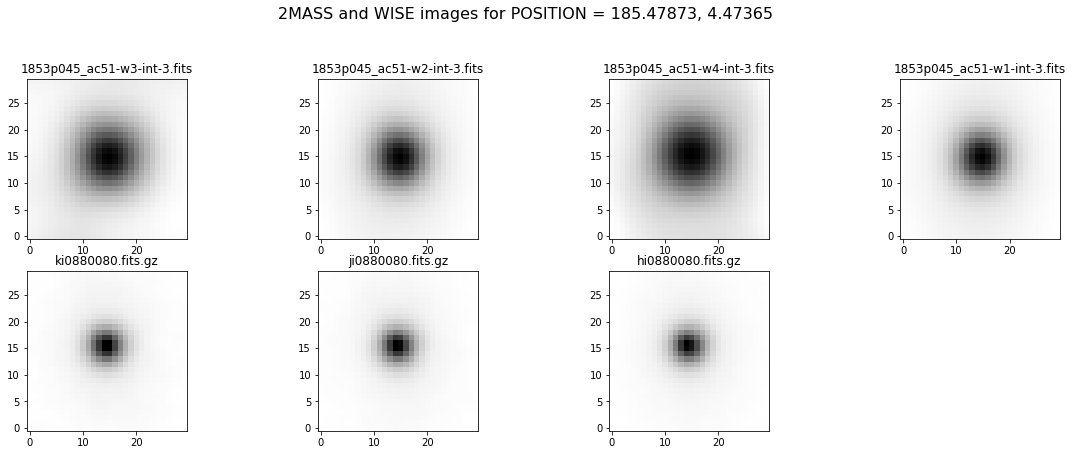

In [242]:
import matplotlib.pyplot as plt
from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord
from astropy.wcs import wcs
import astropy.io.fits as fits
import numpy as np
import os
from astropy.io.fits import getdata, getheader
import astropy.units as u

#Set up the figure.
fig = plt.figure(figsize=(20,10))
plt.suptitle('2MASS and WISE images for POSITION = '+ra+', '+dec, fontsize=16)

#For each image,
i = 0
for filename in downloaded_images['filename']:
    
    #Make the title be the filename
    filename = downloaded_images['filename'][i]
    title = filename
    
    #Read in the image, header, and WCS
    data = getdata(filename, 0)
    header = getheader(filename, 0)
    w = wcs.WCS(header)

    #Make a cutout centered on the search position, with a 30 arcsec width.
    position = SkyCoord(ra, dec, unit = 'deg')
    size = 30.0 #* u.arcsec
    cutout = Cutout2D(data, position, (size, size), wcs=w)

    #Make a subplot for this image.
    ax = fig.add_subplot(3,4,i+1)
    ax.imshow(cutout.data, cmap='gray_r', origin='lower')
    ax.set_title(title)
    
    i = i + 1
    
plt.show()

<a id='multiwavelengthlist'></a>

<a id='simpleconesearch'></a>

## 10. Catalogs: Simple Cone Search

The Simple Cone Search (SCS) protocol is used to search a given table with a given position and radius, getting again a VOTable XML result.

Suppose we were considering proposing for observing time with Chandra. We might first want to check whether any of our sources were already observed by Chandra, XMM or ROSAT? Below, we show the search for the table 'chanmaster', the master catalog of observed Chandra targets, with a search radius of 0.1 degrees.

The SCS is quite straightforward:


In [ ]:
for i in range(len(list_of_galaxies)):
    params = {'table': 'chanmaster', 'RA': list_of_galaxies[i]['ra'], 'DEC':list_of_galaxies[i]['dec'], 'SR':0.1}
    r = requests.get('https://heasarc.gsfc.nasa.gov/cgi-bin/vo/cone/coneGet.pl', params=params)
    table=Table.read(io.BytesIO(r.content))
    print(table)

obsid status name  ra dec time ... exposure type  pi public_date Search_Offset
                  deg deg mjd  ...    s                  mjd                  
----- ------ ---- --- --- ---- ... -------- ---- --- ----------- -------------
obsid status name  ra dec time ... exposure type  pi public_date Search_Offset
                  deg deg mjd  ...    s                  mjd                  
----- ------ ---- --- --- ---- ... -------- ---- --- ----------- -------------
obsid status name  ra dec time ... exposure type  pi public_date Search_Offset
                  deg deg mjd  ...    s                  mjd                  
----- ------ ---- --- --- ---- ... -------- ---- --- ----------- -------------
obsid  status      name        ra    ... type    pi    public_date Search_Offset
                              deg    ...                   mjd                  
----- -------- ----------- --------- ... ---- -------- ----------- -------------
 7937 archived NGC2563-P14 125.81833 ...   GO 

<a href = "#toc">Table of Contents</a>

<a id='tableaccessprotocol'></a>

## 11. Catalogs: Table Access Protocol

<a href = "#toc">Table of Contents</a>

<a id='tapexample1'></a>

### 11a. Simple TAP Query

In [248]:
base_url = "https://irsa.ipac.caltech.edu/TAP/sync?QUERY=SELECT+*+FROM+fp_psc+WHERE+CONTAINS(POINT('J2000',ra,dec),CIRCLE('J2000',66.76957,26.10453,0.01))=1"

In [249]:
# Send the search URL
r = requests.get(base_url)
print(r.status_code)
print(r.url)

# Convert the results into an astropy table.
table=Table.read(io.BytesIO(r.content))

#Print the table.
table.pprint(max_width=-1)

200
https://irsa.ipac.caltech.edu/TAP/sync?QUERY=SELECT+*+FROM+fp_psc+WHERE+CONTAINS(POINT('J2000',ra,dec),CIRCLE('J2000',66.76957,26.10453,0.01))=1
    ra        dec     err_maj err_min err_ang   designation     j_m   j_msig j_cmsig j_msigcom   j_snr     h_m   h_msig h_cmsig h_msigcom   h_snr     k_m   k_msig k_cmsig k_msigcom   k_snr    ph_qual rd_flg bl_flg cc_flg cc_old  ndet   prox  pxpa   pxcntr   gal_contam mp_flg    cntr    hemis   xdate    scan  id    glon    glat           x                   y                   z          x_scan   y_scan     jdate     j_m_psf j_msig_psf j_psfchi j_psf_id h_m_psf h_msig_psf h_psfchi h_psf_id k_m_psf k_msig_psf k_psfchi k_psf_id j_skyval h_skyval k_skyval j_skysig h_skysig k_skysig j_blend h_blend k_blend j_peakpix h_peakpix k_peakpix j_m_stdap j_msig_stdap h_m_stdap h_msig_stdap k_m_stdap k_msig_stdap j_m_lgap j_msig_lgap h_m_lgap h_msig_lgap k_m_lgap k_msig_lgap j_m_r1 j_msig_r1 h_m_r1 h_msig_r1 k_m_r1 k_msig_r1 j_cal  h_cal  k_cal  cnf_flg 

<a href = "#toc">Table of Contents</a>

<a id='tapexample2'></a>

### 11b. Do a table upload example. 

In [252]:
#Convert table to VO table.
#Write VO table.
#Use this example.
#curl -o fp_psc.xml 
#-F "UPLOAD=my_table,param:table" 
#-F "table=@upload.vo" 
#-F "QUERY=SELECT fp_psc.ra, fp_psc.dec FROM fp_psc WHERE CONTAINS(POINT('J2000',ra,dec), CIRCLE('J2000',TAP_UPLOAD.my_table.ra, TAP_UPLOAD.my_table.dec, 0.01)) =1" 
#https://irsa.ipac.caltech.edu/TAP/sync
    

<a href = "#toc">Table of Contents</a>

<a id='ssa'></a>

## 12. Simple Spectral Access

Returning to our science example, suppose that we have analyzed the available Chandra image for the three matches above and discovered that one of these galaxies appears to have a potential ultraluminous X-ray source (ULX)! Now, we want to charatcterize the spectrum for this source. Therefore we will ask for a large exposure time and need to justify this by showing the spectrum of a prototypical ULX, M82 X-1.

In [ ]:
import astropy.coordinates as coord
m82=coord.SkyCoord.from_name("m82")
pos='{},{}'.format(m82.ra.deg,m82.dec.deg)
params = {'table': 'chanmaster',"POS":pos,"SIZE":".01", "REQUEST":"queryData"}
r = requests.get('https://heasarc.nasa.gov/xamin/vo/ssa', params=params)
spec_table = Table.read(io.BytesIO(r.content))
spec_table

In [ ]:
## Get the first spectrum (which has a long-ish exposure.)
import astropy.io.fits as fits
hdu_list=fits.open(spec_table[0]['SSA_reference'].decode()) # Byte format, so just decode() to string
#hdu_list.info()
table = Table(hdu_list[1].data)
table

In [ ]:
for i in range(len(table)):
    matplotlib.rcParams['figure.figsize'] = (18, 16)
    ax=plt.subplot(6,2,i+1)
    pha = plt.plot( table['CHANNEL'][i],table['COUNTS'][i])
    ax.set_yscale('log')
    if table['TG_PART'][i] == 1:
        instr='HEG'
    if table['TG_PART'][i] == 2:
        instr='MEG'
    if table['TG_PART'][i] == 3:
        instr='LEG'
    ax.set_title(str(table['TG_M'][i])+' '+instr)
    plt.tight_layout()

Note: The 12 plots here show all the different HEG and MEG components (+/- 3, +/- 2, and +/- 1 for each grating) for the grating data, as titled. In practice, you might want to download the fits file and use a different analysis and plotting tool to create an energy spectrum plot using SHERPA or XSPEC, etc.
You can download the file directly using this:

In [ ]:
# Python 3
import urllib.request
urllib.request.urlretrieve(spec_table[0]['SSA_reference'].decode(), "my_M82_spectrum.fits")
# Python 2
#import urllib2
#urllib.urlretrieve(spec_table[0]['SSA_reference'].decode(), "my_M82_spectrum.fits")

<a href = "#toc">Table of Contents</a>